In [1]:
# !pip install git+https://github.com/gaarangoa/samecode.git
# !pip install seaborn
# !pip install scipy
# !pip install scikit-learn
# !pip uninstall samv2 --yes

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image

In [3]:
from samecode.plot.pyplot import subplots
import seaborn as sns

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
import pickle

In [5]:
from mazorca.utils import MaskGenerator
from mazorca.utils import MaskFeaturizer
from mazorca.utils import Embedder
from mazorca.utils import PixelPredictor
from mazorca.utils import ObjectPredictor
from mazorca.utils import ObjectCorrector

In [6]:
from sklearn.pipeline import Pipeline

In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Build database

In [10]:
pipe = Pipeline([
    ('generate_masks', MaskGenerator(model='large')),
    ('extract_features', MaskFeaturizer()),
    ('extract_embeddings', Embedder()),
])

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97.8M/97.8M [00:17<00:00, 5.76MB/s]


In [11]:
%%time
image = Image.open('../data/1-3.jpg')
image = np.array(image.convert("RGB"))

objects1 = pipe.transform(image);

masking image ...
Extract feature ...
getting embeddings ...
CPU times: user 6min 36s, sys: 47.1 s, total: 7min 23s
Wall time: 1min 18s


In [12]:
%%time
image = Image.open('../data/1-2.jpg')
image = np.array(image.convert("RGB"))

objects2 = pipe.transform(image);

masking image ...
Extract feature ...
getting embeddings ...
CPU times: user 6min 35s, sys: 49.8 s, total: 7min 25s
Wall time: 1min 18s


In [13]:
%%time
image = Image.open('../data/1-1.jpg')
image = np.array(image.convert("RGB"))

objects3 = pipe.transform(image);

masking image ...
Extract feature ...
getting embeddings ...
CPU times: user 6min 23s, sys: 52.3 s, total: 7min 15s
Wall time: 1min 17s


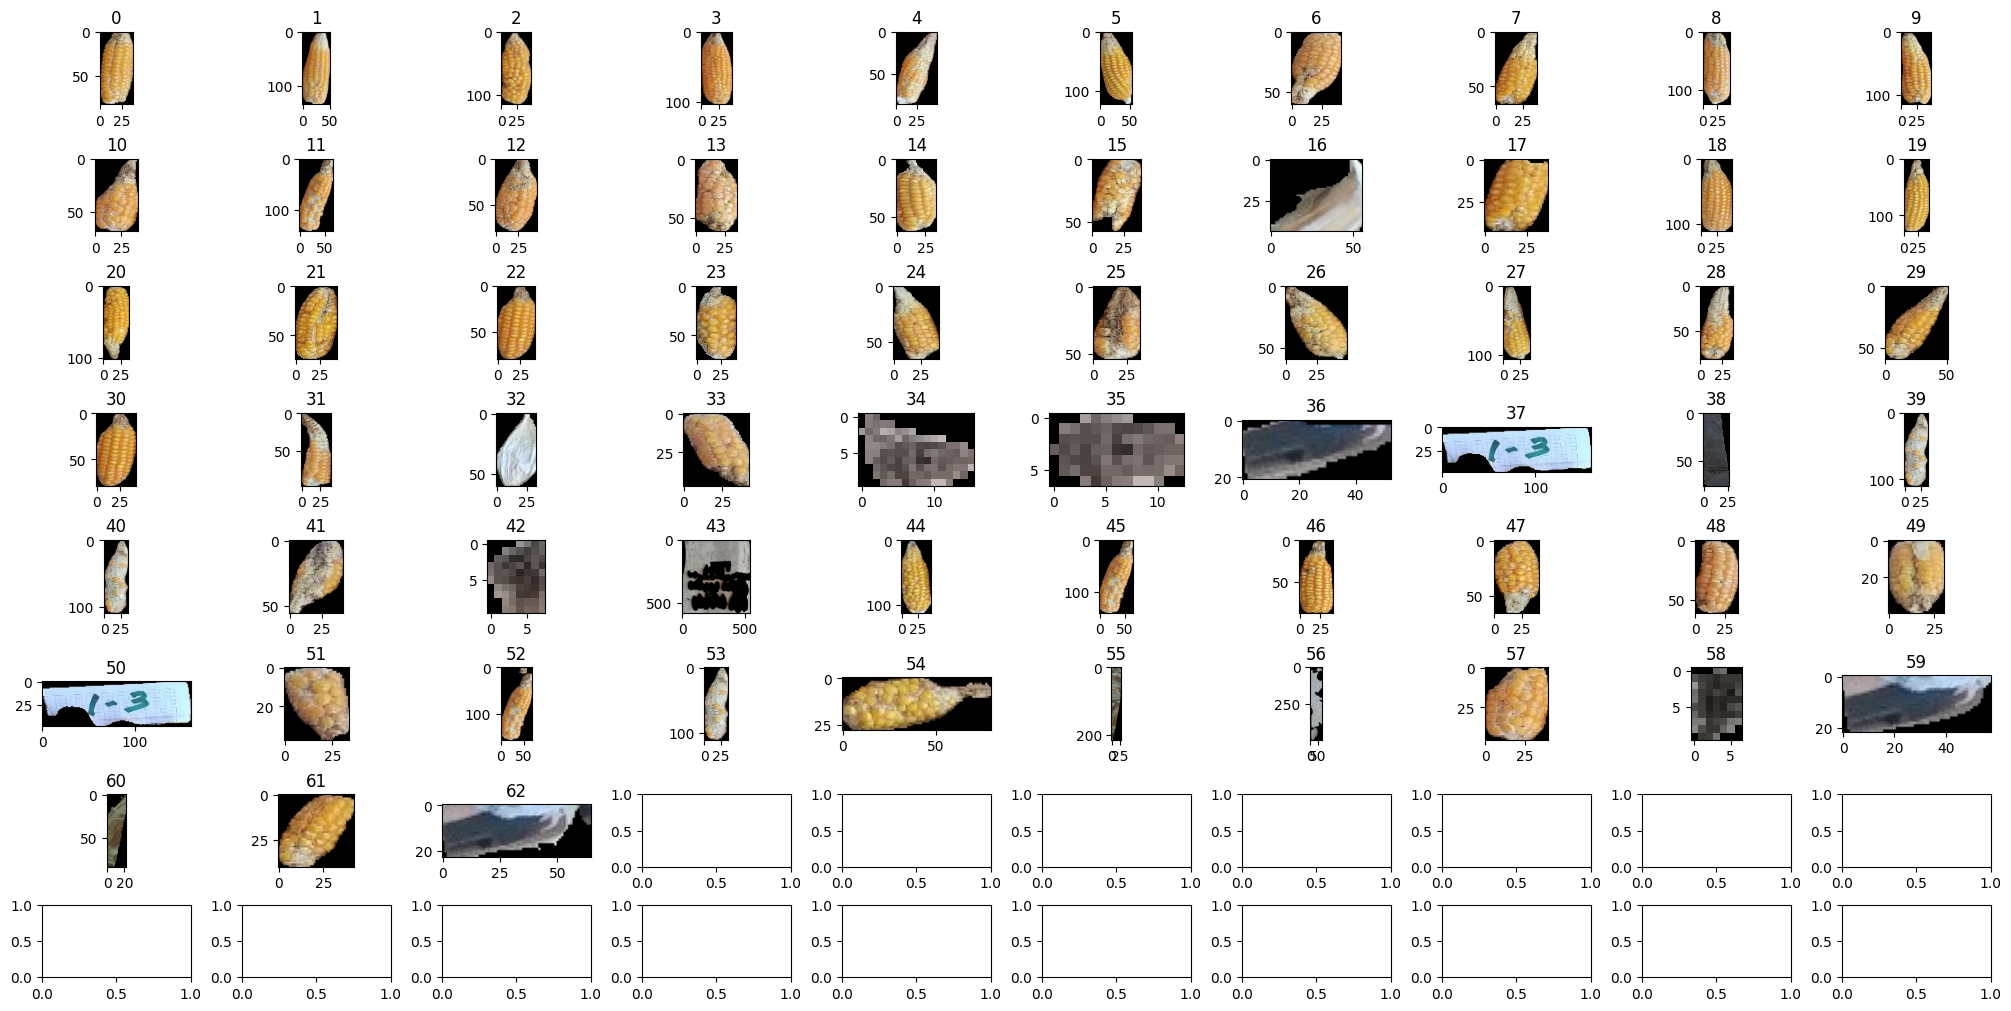

In [14]:
axs = subplots(cols=10, rows=8, h=10, w=20)
for ix, object_ in enumerate([i for i in objects1]):
    axs[ix].imshow(object_['segmented_image'])
    axs[ix].set_title(ix)

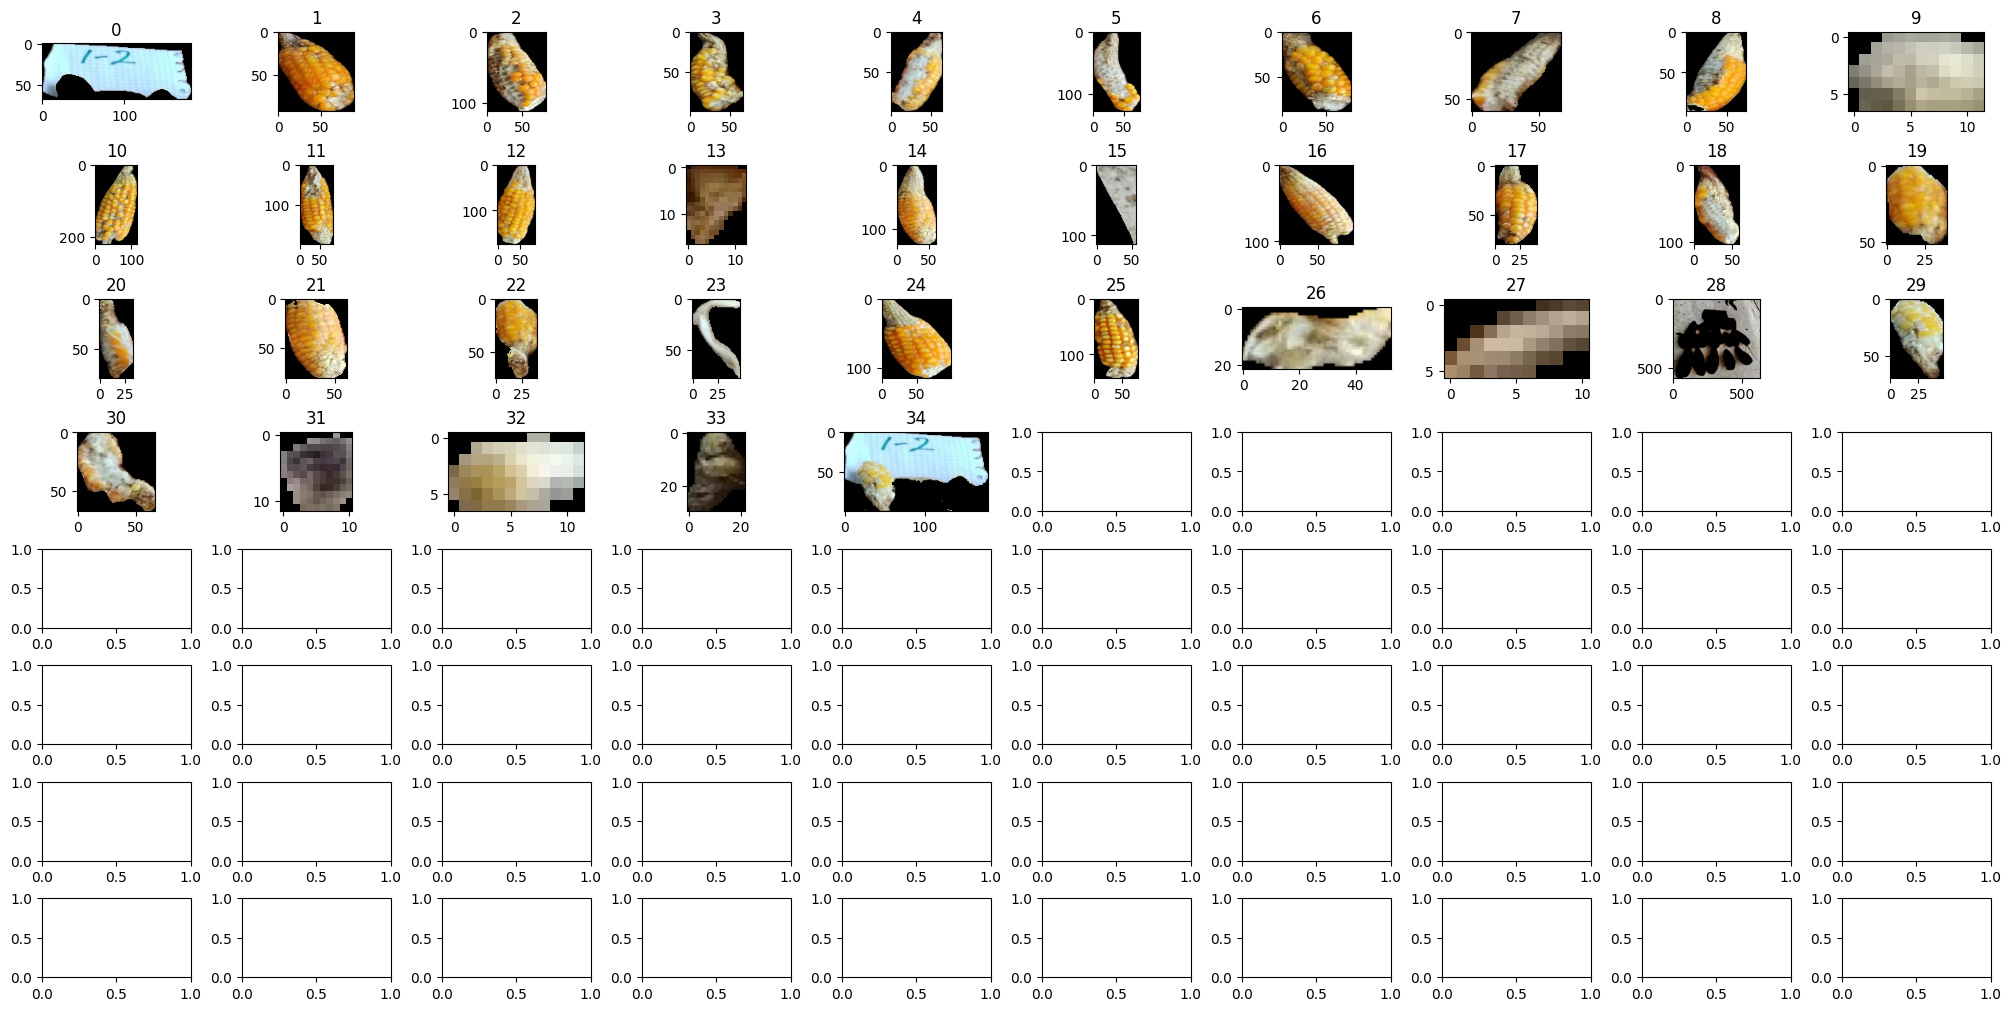

In [15]:
axs = subplots(cols=10, rows=8, h=10, w=20)
for ix, object_ in enumerate([i for i in objects2]):
    axs[ix].imshow(object_['segmented_image'])
    axs[ix].set_title(ix)

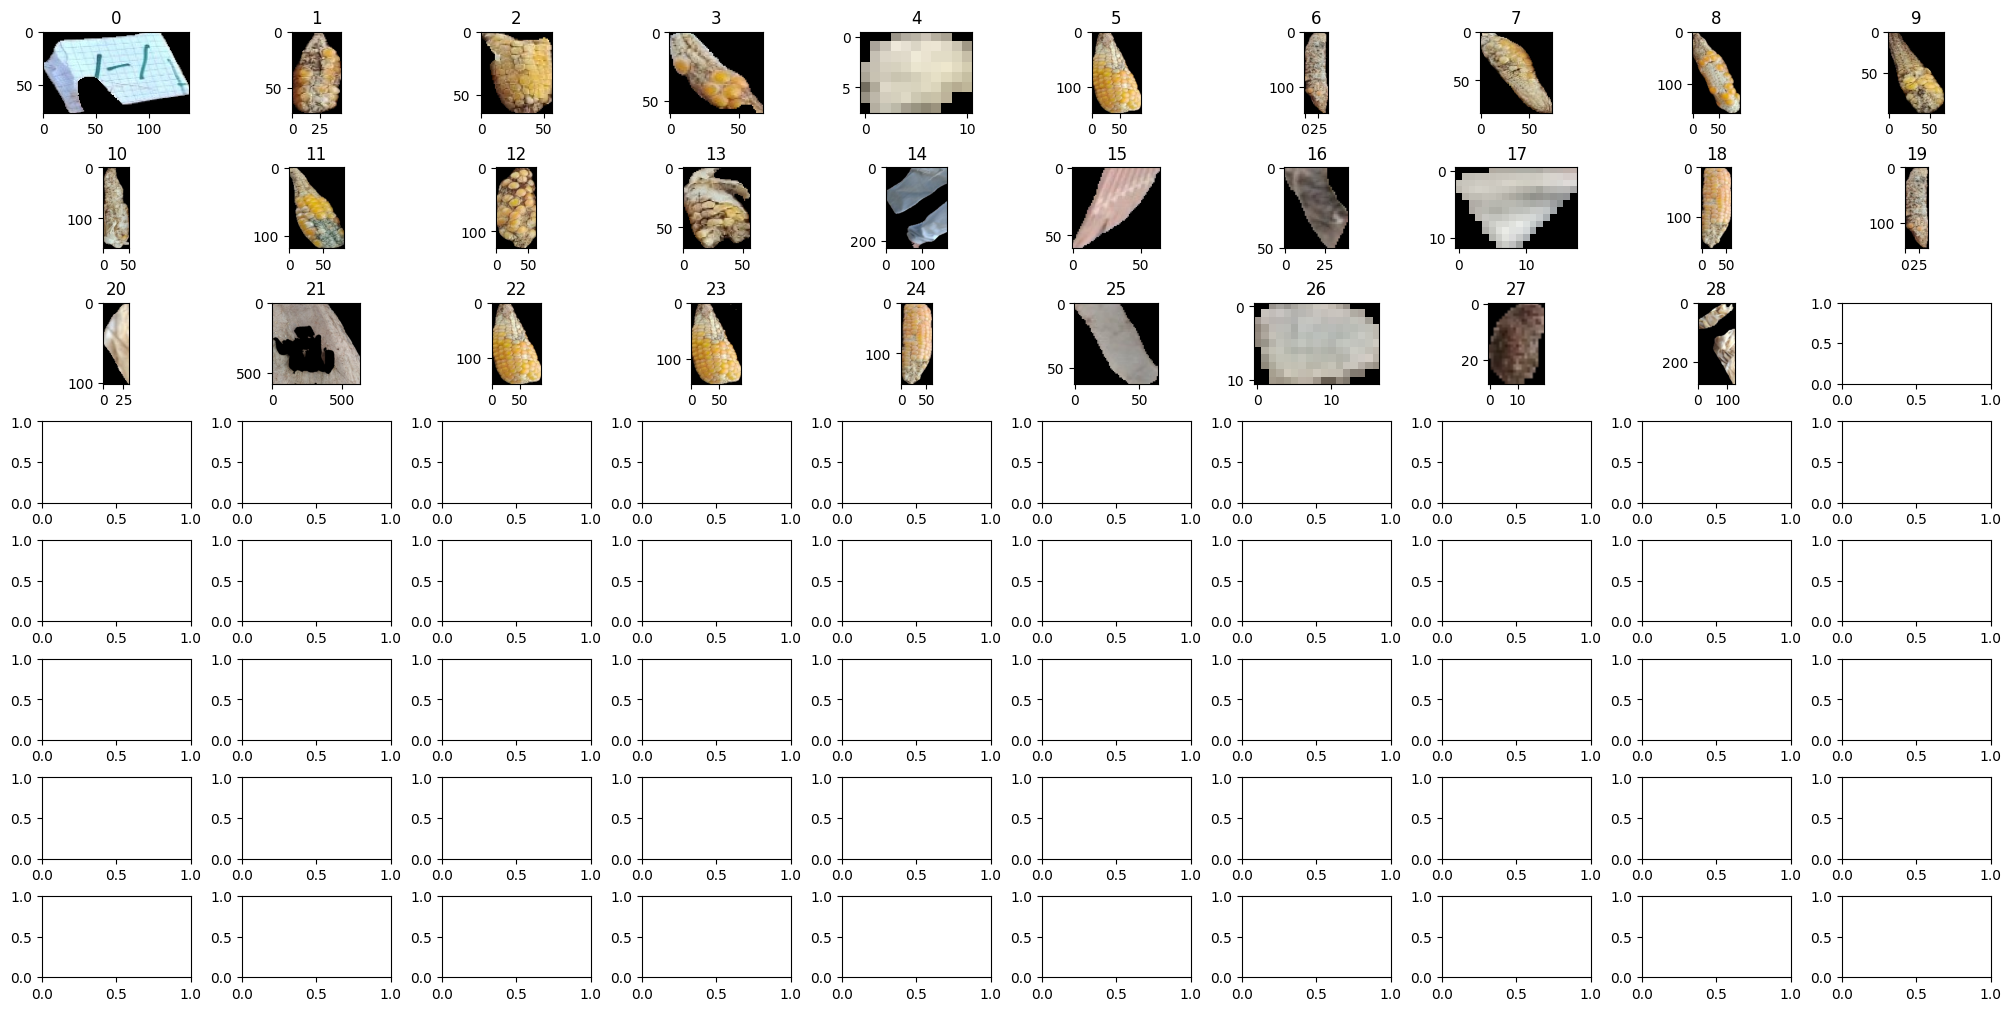

In [16]:
axs = subplots(cols=10, rows=8, h=10, w=20)
for ix, object_ in enumerate([i for i in objects3]):
    axs[ix].imshow(object_['segmented_image'])
    axs[ix].set_title(ix)

In [17]:
labels1 = np.ones(len(objects1))
labels1[[16, 32,34,35,36,37,38,42,43,50,55,56,58,59,60,62]] = 0

In [18]:
labels2 = np.ones(len(objects2))
labels2[[0,9,13,15,23,26,27,28,31,32,33,34]] = 0

In [19]:
labels3 = np.ones(len(objects3))
labels3[[0,4,14,15,16,17,20,21,25,26,27,28]] = 0

In [20]:
labels = np.concatenate([labels1, labels2, labels3])

In [21]:
# # features = ['area', 'w_pr', 'predicted_iou', 'stability_score']
# features = ['mean_R', 'mean_G', 'mean_B', 'meanb_R', 'meanb_G', 'meanb_B', 'area', 'predicted_iou', 'stability_score', 'w_pr', 'area_relative_image']

# data1 = [ [i[k] for k in features] for i in objects1]
# data1 = pd.DataFrame(data1, columns = features)

# data2 = [ [i[k] for k in features] for i in objects2]
# data2 = pd.DataFrame(data2, columns = features)

# data3 = [ [i[k] for k in features] for i in objects3]
# data3 = pd.DataFrame(data3, columns = features)

In [22]:
data1 = np.array([ i['embeddings'] for i in objects1])
# data1 = pd.DataFrame(data1, columns = features)

data2 = np.array([ i['embeddings'] for i in objects2])
# data2 = pd.DataFrame(data2, columns = features)

data3 = np.array([ i['embeddings'] for i in objects3])
# data3 = pd.DataFrame(data3, columns = features)

In [23]:
data1.shape, data2.shape, data3.shape

((63, 1000), (35, 1000), (29, 1000))

In [24]:
data = np.concatenate([data1, data2, data3])
data.shape

(127, 1000)

In [25]:
predictor = RandomForestClassifier(random_state=0, n_estimators=1000, ).fit(
    data, labels
)

pickle.dump(['embeddings', predictor], open('../models/predict_corn.pk', 'wb'))

<Axes: >

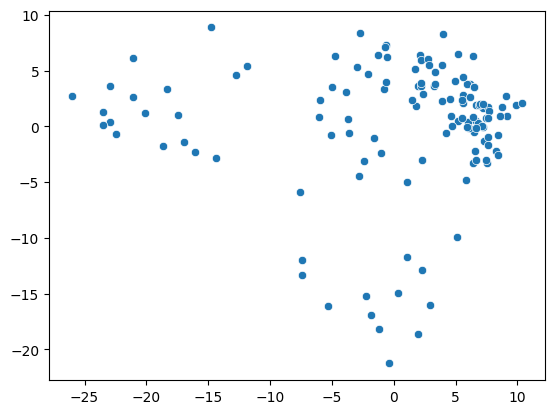

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
p = pca.fit_transform(data)

sns.scatterplot(x=p[:, 0], y=p[:, 1])